In [1]:
from transformers import AutoTokenizer, AutoModel

from sklearn.decomposition import PCA

import torch

import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import pandas as pd
import numpy as np
import re
import seaborn as sns

%load_ext autotime

time: 0 ns (started: 2021-05-22 16:43:21 +03:00)


In [88]:
BERT_3CosAdd = pd.read_csv('bert_results_3CosAdd', sep='\t')

BERT_3CosAdd.index = list(BERT_3CosAdd['Unnamed: 0'])

BERT_3CosAdd = BERT_3CosAdd.drop(columns=['Unnamed: 0'])

column_list = ['A1','A2','A3','A4', 'A5','A6','A7','A8','A9','A10','A11','A12','A13']
BERT_3CosAdd.columns = column_list

BERT_3CosAdd

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
RuBERT,0.65,0.76,0.20,0.33,0.97,0.78,0.81,0.69,0.89,0.42,0.52,0.13,0.04
RuBERT Sentence,0.66,0.86,0.29,0.43,0.99,0.91,0.97,0.83,0.96,0.73,0.60,0.27,0.05
RuBERT Conversational,0.57,0.63,0.10,0.18,0.98,0.80,0.71,0.62,0.88,0.40,0.26,0.16,0.04


time: 16 ms (started: 2021-05-22 15:08:44 +03:00)


In [89]:
BERT_3CosAvg = pd.read_csv('bert_results_3CosAvg', sep='\t')

BERT_3CosAvg.index = list(BERT_3CosAvg['Unnamed: 0'])

BERT_3CosAvg = BERT_3CosAvg.drop(columns=['Unnamed: 0'])

column_list = ['A1','A2','A3','A4', 'A5','A6','A7','A8','A9','A10','A11','A12','A13']
BERT_3CosAvg.columns = column_list

BERT_3CosAvg

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
RuBERT,0.81,0.83,0.31,0.44,0.99,0.95,0.98,0.80,0.97,0.63,0.80,0.09,0.04
RuBERT Sentence,0.85,0.98,0.31,0.52,1.00,0.98,1.00,0.89,1.00,0.83,0.84,0.39,0.04
RuBERT Conversational,0.93,0.78,0.15,0.33,1.00,0.93,0.78,0.71,0.97,0.63,0.28,0.26,0.04


time: 15 ms (started: 2021-05-22 15:08:44 +03:00)


In [90]:
elmo_ru_news_scores_3CosAdd = pd.read_csv('elmo_ru_news_3CosAdd_results', sep='\t')
elmo_ru_news_scores_3CosAdd = elmo_ru_news_scores_3CosAdd.drop(columns=['Unnamed: 0']).T
elmo_ru_wiki_scores_3CosAdd = pd.read_csv('elmo_ru_wiki_3CosAdd_results', sep='\t')
elmo_ru_wiki_scores_3CosAdd = elmo_ru_wiki_scores_3CosAdd.drop(columns=['Unnamed: 0']).T
elmo_ru_twitter_scores_3CosAdd = pd.read_csv('elmo_ru_twitter_3CosAdd_results', sep='\t')
elmo_ru_twitter_scores_3CosAdd = elmo_ru_twitter_scores_3CosAdd.drop(columns=['Unnamed: 0']).T

ELMo_3CosAdd = pd.DataFrame()

ELMo_3CosAdd = ELMo_3CosAdd.append(elmo_ru_news_scores_3CosAdd,ignore_index=True)
ELMo_3CosAdd = ELMo_3CosAdd.append(elmo_ru_wiki_scores_3CosAdd,ignore_index=True)
ELMo_3CosAdd = ELMo_3CosAdd.append(elmo_ru_twitter_scores_3CosAdd,ignore_index=True)

ELMo_model_list = ['ELMo Ru News', 'ELMo Ru Wiki', 'ELMo Ru Twitter']
column_list = ['A1','A2','A3','A4', 'A5','A6','A7','A8','A9','A10','A11','A12','A13']


ELMo_3CosAdd.columns = column_list
ELMo_3CosAdd.index = ELMo_model_list

ELMo_3CosAdd

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
ELMo Ru News,0.905350,0.594884,0.174556,0.451303,0.9879,0.903699,0.980826,0.942149,0.940299,0.965556,0.8784,0.379962,0.142684
ELMo Ru Wiki,0.891632,0.668650,0.213018,0.517147,0.9835,0.965561,0.973554,0.962975,0.937625,0.966667,0.8464,0.561437,0.167637
ELMo Ru Twitter,0.946502,0.711481,0.146450,0.418381,0.9895,0.953444,0.962645,0.931240,0.950100,0.966667,0.9584,0.393195,0.077429


time: 31 ms (started: 2021-05-22 15:08:55 +03:00)


In [91]:
elmo_ru_news_scores_3CosAvg = pd.read_csv('elmo_ru_news_3CosAvg_results', sep='\t')
elmo_ru_news_scores_3CosAvg = elmo_ru_news_scores_3CosAvg.drop(columns=['Unnamed: 0']).T
elmo_ru_wiki_scores_3CosAvg = pd.read_csv('elmo_ru_wiki_3CosAvg_results', sep='\t')
elmo_ru_wiki_scores_3CosAvg = elmo_ru_wiki_scores_3CosAvg.drop(columns=['Unnamed: 0']).T
elmo_ru_twitter_scores_3CosAvg = pd.read_csv('elmo_ru_twitter_3CosAvg_results', sep='\t')
elmo_ru_twitter_scores_3CosAvg = elmo_ru_twitter_scores_3CosAvg.drop(columns=['Unnamed: 0']).T

ELMo_3CosAvg = pd.DataFrame()

ELMo_3CosAvg = ELMo_3CosAvg.append(elmo_ru_news_scores_3CosAvg,ignore_index=True)
ELMo_3CosAvg = ELMo_3CosAvg.append(elmo_ru_wiki_scores_3CosAvg,ignore_index=True)
ELMo_3CosAvg = ELMo_3CosAvg.append(elmo_ru_twitter_scores_3CosAvg,ignore_index=True)

ELMo_model_list = ['ELMo Ru News', 'ELMo Ru Wiki', 'ELMo Ru Twitter']
column_list = ['A1','A2','A3','A4', 'A5','A6','A7','A8','A9','A10','A11','A12','A13']

ELMo_3CosAvg.index = ELMo_model_list
ELMo_3CosAvg.columns = column_list

ELMo_3CosAvg

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
ELMo Ru News,0.962963,0.682927,0.192308,0.703704,1.00,0.946429,1.0,1.000000,0.955224,1.0,0.92,0.565217,0.243478
ELMo Ru Wiki,0.925926,0.756098,0.269231,0.592593,0.99,1.000000,1.0,0.981818,0.955224,1.0,0.92,0.695652,0.217391
ELMo Ru Twitter,1.000000,0.853659,0.115385,0.444444,1.00,1.000000,1.0,0.981818,0.985075,1.0,1.00,0.521739,0.121739


time: 31 ms (started: 2021-05-22 15:08:56 +03:00)


# Результаты методом 3CosAdd

In [92]:
CosAdd_results = pd.DataFrame()

CosAdd_results = CosAdd_results.append(BERT_3CosAdd)
CosAdd_results = CosAdd_results.append(ELMo_3CosAdd)

CosAdd_results

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
RuBERT,0.650000,0.760000,0.200000,0.330000,0.9700,0.780000,0.810000,0.690000,0.890000,0.420000,0.5200,0.130000,0.040000
RuBERT Sentence,0.660000,0.860000,0.290000,0.430000,0.9900,0.910000,0.970000,0.830000,0.960000,0.730000,0.6000,0.270000,0.050000
RuBERT Conversational,0.570000,0.630000,0.100000,0.180000,0.9800,0.800000,0.710000,0.620000,0.880000,0.400000,0.2600,0.160000,0.040000
ELMo Ru News,0.905350,0.594884,0.174556,0.451303,0.9879,0.903699,0.980826,0.942149,0.940299,0.965556,0.8784,0.379962,0.142684
ELMo Ru Wiki,0.891632,0.668650,0.213018,0.517147,0.9835,0.965561,0.973554,0.962975,0.937625,0.966667,0.8464,0.561437,0.167637
ELMo Ru Twitter,0.946502,0.711481,0.146450,0.418381,0.9895,0.953444,0.962645,0.931240,0.950100,0.966667,0.9584,0.393195,0.077429


time: 15 ms (started: 2021-05-22 15:08:59 +03:00)


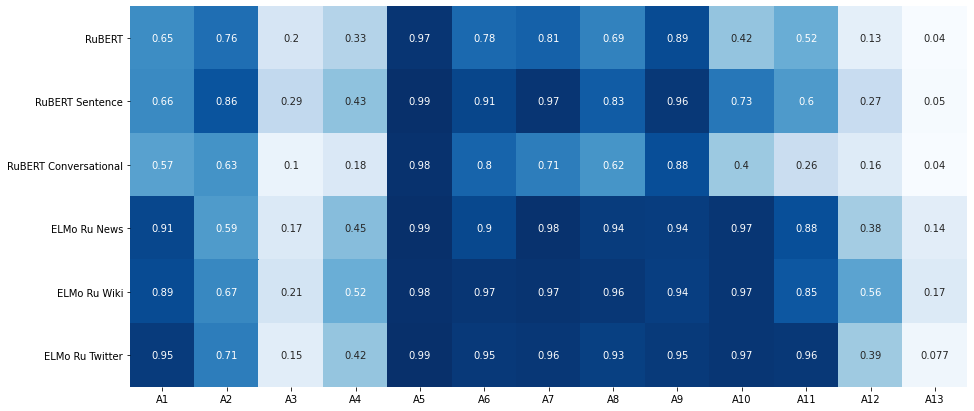

time: 359 ms (started: 2021-05-22 15:08:59 +03:00)


In [93]:
f, axes = plt.subplots(1, 1, figsize=(15, 7))
axes = sns.heatmap(CosAdd_results, annot=True, cmap='Blues', cbar=False)

# Результаты методом 3CosAvg

In [94]:
CosAvg_results = pd.DataFrame()

CosAvg_results = CosAvg_results.append(BERT_3CosAvg)
CosAvg_results = CosAvg_results.append(ELMo_3CosAvg)

CosAvg_results

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13
RuBERT,0.810000,0.830000,0.310000,0.440000,0.99,0.950000,0.98,0.800000,0.970000,0.63,0.80,0.090000,0.040000
RuBERT Sentence,0.850000,0.980000,0.310000,0.520000,1.00,0.980000,1.00,0.890000,1.000000,0.83,0.84,0.390000,0.040000
RuBERT Conversational,0.930000,0.780000,0.150000,0.330000,1.00,0.930000,0.78,0.710000,0.970000,0.63,0.28,0.260000,0.040000
ELMo Ru News,0.962963,0.682927,0.192308,0.703704,1.00,0.946429,1.00,1.000000,0.955224,1.00,0.92,0.565217,0.243478
ELMo Ru Wiki,0.925926,0.756098,0.269231,0.592593,0.99,1.000000,1.00,0.981818,0.955224,1.00,0.92,0.695652,0.217391
ELMo Ru Twitter,1.000000,0.853659,0.115385,0.444444,1.00,1.000000,1.00,0.981818,0.985075,1.00,1.00,0.521739,0.121739


time: 15 ms (started: 2021-05-22 15:09:06 +03:00)


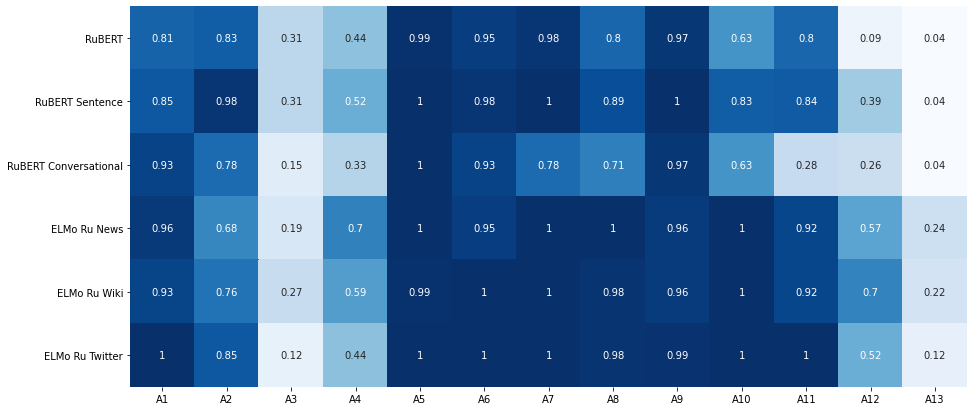

time: 343 ms (started: 2021-05-22 15:09:07 +03:00)


In [95]:
f, axes = plt.subplots(1, 1, figsize=(15, 7))
axes = sns.heatmap(CosAvg_results, annot=True, cmap='Blues', cbar=False)

In [28]:
BERT_3CosAdd

,0,1,2,3,4,5,6,7,8,9,10,11,12
RuBERT,0.65,0.76,0.20,0.33,0.97,0.78,0.81,0.69,0.89,0.42,0.52,0.13,0.04
RuBERT Sentence,0.66,0.86,0.29,0.43,0.99,0.91,0.97,0.83,0.96,0.73,0.60,0.27,0.05
RuBERT Conversational,0.57,0.63,0.10,0.18,0.98,0.80,0.71,0.62,0.88,0.40,0.26,0.16,0.04


time: 15 ms (started: 2021-05-22 12:00:28 +03:00)


In [29]:
ELMo_3CosAvg

,0,1,2,3,4,5,6,7,8,9,10,11,12
ELMo Ru News,0.905350,0.594884,0.174556,0.451303,0.9879,0.903699,0.980826,0.942149,0.940299,0.965556,0.8784,0.379962,0.142684
ELMo Ru Wiki,0.891632,0.668650,0.213018,0.517147,0.9835,0.965561,0.973554,0.962975,0.937625,0.966667,0.8464,0.561437,0.167637
ELMo Ru Twitter,1.000000,0.853659,0.115385,0.444444,1.0000,1.000000,1.000000,0.981818,0.985075,1.000000,1.0000,0.521739,0.121739


time: 15 ms (started: 2021-05-22 12:00:31 +03:00)


## Гистограмма косинусной близости вектора переноса и векторов разностей пар слов


In [2]:
from os import listdir
from os.path import isfile, join

mypath = 'C:\\Users\\Asus\\Data analysis\\Учеба\\ДИПЛОМ\\Работа Магистра\\Analogies\\Small\\'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles = onlyfiles

time: 15 ms (started: 2021-05-22 16:43:21 +03:00)


In [3]:
def unique_list(l):
    ulist = []
    [ulist.append(x) for x in l if x not in ulist]
    return ulist

time: 0 ns (started: 2021-05-22 16:43:21 +03:00)


In [4]:
def get_analogy_words(filename):
    
    with open(filename, encoding='utf-8') as f:
        content = f.readlines()
    
    words_to_agg = [x.strip() for x in content] 
    
    words_to_agg = " ".join(words_to_agg)
    words_to_agg = " ".join(words_to_agg.split('_'))
    
    stop_words = ['PROPN', 'ADJ', 'VERB','ADV', 'NOUN']
    
    for i in stop_words:
        words_to_agg = words_to_agg.replace(i, '')
    
    words_to_agg = words_to_agg.replace('й','и')
    
    words_to_agg = ' '.join(unique_list(words_to_agg.split()))
    
    return words_to_agg

time: 15 ms (started: 2021-05-22 16:43:21 +03:00)


In [5]:
def get_d(words_to_embed, words_embeddings):
    index_list = np.arange(0,len(words_to_embed.split()))
    evensList = [x for x in index_list if x % 2 == 0]
    index_list =  np.arange(0,len(evensList))
    
    word_1 = [words_to_embed.lower().split()[i] for i in evensList]
    word_2 = [words_to_embed.lower().split()[i+1] for i in evensList]
    
    N_tasks = 0
    N_correct = 0
    
    v_1 = 0
    v_2 = 0

    for pair_id in index_list:
        v_1 += words_embeddings.loc[word_1[pair_id]]
        v_2 += words_embeddings.loc[word_2[pair_id]]

    d = (v_1 - v_2)/len(index_list)
    
    return d

time: 16 ms (started: 2021-05-22 16:43:21 +03:00)


In [120]:
def solve_analogy_3CosAvg(words_to_embed, words_embeddings):
    
    index_list = np.arange(0,len(words_to_embed.split()))
    evensList = [x for x in index_list if x % 2 == 0]
    index_list =  np.arange(0,len(evensList))
    
    word_1 = [words_to_embed.lower().split()[i] for i in evensList]
    word_2 = [words_to_embed.lower().split()[i+1] for i in evensList]
    
    N_tasks = 0
    N_correct = 0
    
    v_1 = 0
    v_2 = 0

    for pair_id in index_list:
        v_1 += words_embeddings.loc[word_1[pair_id]]
        v_2 += words_embeddings.loc[word_2[pair_id]]

    d = (v_1 - v_2)/len(index_list)
    
    N_tasks = 0
    N_correct = 0
    
    list_correct = []
    
    

    for word_2_index in range(len(word_2)):
        #print('looking for ', word_1[word_2_index])
        
        argmax = 0
        i_max = 0
        
        for word_vector in words_to_embed.lower().split():
            
            vecs_to_exclude = [word_2[word_2_index]]
            
            if (word_vector not in vecs_to_exclude):
                
                res = 1 - cosine(words_embeddings.loc[word_vector], (words_embeddings.loc[word_2[word_2_index]] + d))
                
                if (res > argmax):
                    argmax = res
                    i_max = word_vector
                    
            
            
        #print(word_2[word_2_index], '- d = ', i_max)
        N_tasks +=1
    
        if (i_max == word_1[word_2_index]):
            N_correct += 1
            list_correct.append(i_max)
    
    print('Accuracy score =', N_correct/N_tasks)
    print(N_correct)
    print(N_tasks)
    
    score = N_correct/N_tasks
    
    return list_correct

time: 0 ns (started: 2021-05-23 18:13:23 +03:00)


In [16]:
for i in range(13,14):
    file_name = 'elmo_ru_twitter_analogy'+str(i)+'_emb'
    file_words = 'C:\\Users\\Asus\\Data analysis\\Учеба\\ДИПЛОМ\\Работа Магистра\\Analogies\\Small\\'+onlyfiles[i]

    analogy_words = get_analogy_words(file_words)
    
    analogy_embeddings = pd.read_csv(file_name, sep='\t')
    analogy_embeddings.index = analogy_embeddings['Unnamed: 0']
    analogy_embeddings = analogy_embeddings.drop(columns=['Unnamed: 0'])
    
    d_12 = get_d(analogy_words,analogy_embeddings)

time: 235 ms (started: 2021-05-23 17:05:50 +03:00)


In [17]:
index_list = np.arange(0,len(analogy_words.split()))
evensList = [x for x in index_list if x % 2 == 0]
index_list =  np.arange(0,len(evensList))
    
word_1 = [analogy_words.lower().split()[i] for i in evensList]
word_2 = [analogy_words.lower().split()[i+1] for i in evensList]

time: 16 ms (started: 2021-05-23 17:05:51 +03:00)


In [18]:
cos_list = []

for i in range(len(word_1)):
    
    res = 1 - cosine(d_12, (analogy_embeddings.loc[word_1[i]] - analogy_embeddings.loc[word_2[i]]))
    cos_list.append(res)

time: 62 ms (started: 2021-05-23 17:05:51 +03:00)


Text(0.5, 1.0, 'Категория «Любая столица мира – страна»')

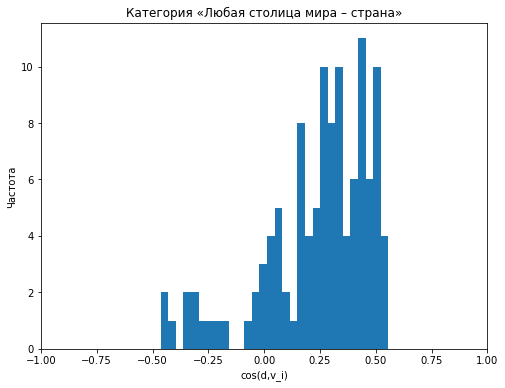

time: 172 ms (started: 2021-05-23 17:06:11 +03:00)


In [20]:
plt.figure(figsize=(8,6))
plt.hist(cos_list, bins=30)
plt.xlabel('cos(d,v_i)')
plt.ylabel('Частота')
plt.xlim(-1,1)
plt.title('Категория «Любая столица мира – страна»')

In [11]:
plt.xscale?

time: 156 ms (started: 2021-05-23 17:04:17 +03:00)


In [21]:
for i in range(3,4):
    file_name = 'elmo_ru_twitter_analogy'+str(i)+'_emb'
    file_words = 'C:\\Users\\Asus\\Data analysis\\Учеба\\ДИПЛОМ\\Работа Магистра\\Analogies\\Small\\'+onlyfiles[i]

    analogy_words = get_analogy_words(file_words)
    
    analogy_embeddings = pd.read_csv(file_name, sep='\t')
    analogy_embeddings.index = analogy_embeddings['Unnamed: 0']
    analogy_embeddings = analogy_embeddings.drop(columns=['Unnamed: 0'])
    
    d_12 = get_d(analogy_words,analogy_embeddings)

time: 109 ms (started: 2021-05-23 17:06:52 +03:00)


In [22]:
index_list = np.arange(0,len(analogy_words.split()))
evensList = [x for x in index_list if x % 2 == 0]
index_list =  np.arange(0,len(evensList))
    
word_1 = [analogy_words.lower().split()[i] for i in evensList]
word_2 = [analogy_words.lower().split()[i+1] for i in evensList]

time: 0 ns (started: 2021-05-23 17:06:52 +03:00)


In [23]:
cos_list = []

for i in range(len(word_1)):
    
    res = 1 - cosine(d_12, (analogy_embeddings.loc[word_1[i]] - analogy_embeddings.loc[word_2[i]]))
    cos_list.append(res)

time: 15 ms (started: 2021-05-23 17:06:53 +03:00)


Text(0.5, 1.0, 'Категория «Страна - язык»')

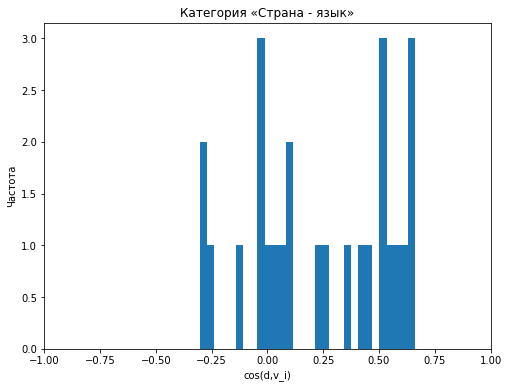

time: 171 ms (started: 2021-05-23 17:07:01 +03:00)


In [25]:
plt.figure(figsize=(8,6))
plt.hist(cos_list, bins=30)
plt.xlabel('cos(d,v_i)')
plt.ylabel('Частота')
plt.xlim(-1,1)
plt.title('Категория «Страна - язык»')

In [26]:
length_vi_list

for i in range(11,12):
    file_name = 'elmo_ru_news_analogy'+str(i)+'_emb'
    file_words = 'C:\\Users\\Asus\\Data analysis\\Учеба\\ДИПЛОМ\\Работа Магистра\\Analogies\\Small\\'+onlyfiles[i]

    analogy_words = get_analogy_words(file_words)
    
    analogy_embeddings = pd.read_csv(file_name, sep='\t')
    analogy_embeddings.index = analogy_embeddings['Unnamed: 0']
    analogy_embeddings = analogy_embeddings.drop(columns=['Unnamed: 0'])
    
    d_12 = get_d(analogy_words,analogy_embeddings)
    
    

time: 94 ms (started: 2021-05-23 17:11:12 +03:00)


In [27]:
index_list = np.arange(0,len(analogy_words.split()))
evensList = [x for x in index_list if x % 2 == 0]
index_list =  np.arange(0,len(evensList))
    
word_1 = [analogy_words.lower().split()[i] for i in evensList]
word_2 = [analogy_words.lower().split()[i+1] for i in evensList]

time: 16 ms (started: 2021-05-23 17:11:12 +03:00)


In [28]:
cos_list = []

for i in range(len(word_1)):
    
    res = 1 - cosine(d_12, (analogy_embeddings.loc[word_1[i]] - analogy_embeddings.loc[word_2[i]]))
    cos_list.append(res)

time: 16 ms (started: 2021-05-23 17:11:13 +03:00)


Text(0.5, 1.0, 'Категория «Прилагательное - сравнительная степень»')

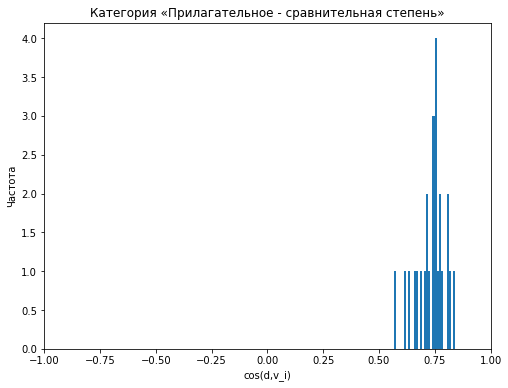

time: 187 ms (started: 2021-05-23 17:12:58 +03:00)


In [31]:
plt.figure(figsize=(8,6))
plt.hist(cos_list, bins=30)
plt.xlabel('cos(d,v_i)')
plt.ylabel('Частота')
plt.xlim(-1,1)
plt.title('Категория «Прилагательное - сравнительная степень»')

In [156]:
for i in range(9,10):
    file_name = 'elmo_ru_twitter_analogy'+str(i)+'_emb'
    file_words = 'C:\\Users\\Asus\\Data analysis\\Учеба\\ДИПЛОМ\\Работа Магистра\\Analogies\\Small\\'+onlyfiles[i]

    analogy_words = get_analogy_words(file_words)
    
    analogy_embeddings = pd.read_csv(file_name, sep='\t')
    analogy_embeddings.index = analogy_embeddings['Unnamed: 0']
    analogy_embeddings = analogy_embeddings.drop(columns=['Unnamed: 0'])
    
    d_12 = get_d(analogy_words,analogy_embeddings)

time: 171 ms (started: 2021-05-23 20:19:51 +03:00)


In [157]:
index_list = np.arange(0,len(analogy_words.split()))
evensList = [x for x in index_list if x % 2 == 0]
index_list =  np.arange(0,len(evensList))
    
word_1 = [analogy_words.lower().split()[i] for i in evensList]
word_2 = [analogy_words.lower().split()[i+1] for i in evensList]

time: 0 ns (started: 2021-05-23 20:19:51 +03:00)


In [158]:
correct_words = solve_analogy_3CosAvg(analogy_words,analogy_embeddings)

Accuracy score = 0.9850746268656716
66
67
time: 4.01 s (started: 2021-05-23 20:19:51 +03:00)


In [159]:
cos_list_correct = []
cos_list_wrong = []
length_correct = []
length_wrong = []

for i in range(len(word_1)):
    
    res = 1 - cosine(d_12, (analogy_embeddings.loc[word_1[i]] - analogy_embeddings.loc[word_2[i]]))
    
    
    if(word_1[i] in correct_words):     
        summa = analogy_embeddings.loc[word_1[i]] - analogy_embeddings.loc[word_2[i]]
        summa = summa**2
        length_correct.append((np.sqrt(np.sum(summa))))
        cos_list_correct.append(res)
        
    else:   
        summa = analogy_embeddings.loc[word_1[i]] - analogy_embeddings.loc[word_2[i]]
        summa = summa**2
        length_wrong.append((np.sqrt(np.sum(summa))))
        cos_list_wrong.append(res)

time: 78 ms (started: 2021-05-23 20:19:55 +03:00)


Text(0.5, 1.0, 'Категория «Страна - прилагательное»')

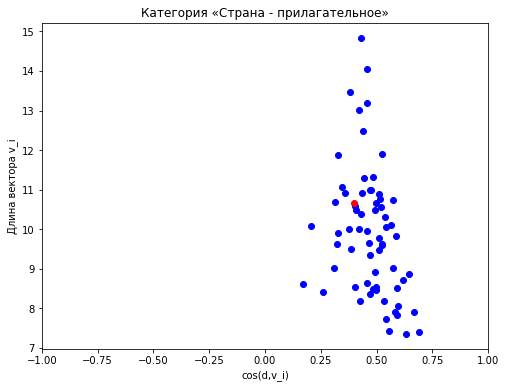

time: 203 ms (started: 2021-05-23 20:19:55 +03:00)


In [160]:
plt.figure(figsize=(8,6))
plt.scatter(cos_list_correct,length_correct, c='blue')
plt.scatter(cos_list_wrong,length_wrong, c='red')
plt.xlabel('cos(d,v_i)')
plt.ylabel('Длина вектора v_i')
plt.xlim(-1,1)
plt.title('Категория «Страна - прилагательное»')

In [161]:
analogy_words

'актер актриса мальчик девочка брат сестра бык корова бизнесмен бизнесвумен председатель председательница папа мама герцог герцогиня император императрица лис лисица бог богиня дедушка бабушка внук внучка жених невеста руководитель руководительница наследник наследница герои героиня муж жена король королева лев львица мужчина женщина директор директриса племянник племянница поэт поэтесса полицеискии полицеиская принц принцесса баран овца петух курица сын дочь жеребец кобыла тигр тигрица дядя тетя официант официантка вор воровка конь лошадь юноша девушка старик старуха супруг супруга красавец красавица певец певица тесть теща отчим мачеха работник работница школьник школьница виновник виновница учитель учительница писатель писательница ткач ткачиха артист артистка студент студентка чемпион чемпионка колдун колдунья журналист журналистка тракторист трактористка разведчик разведчица воспитатель воспитательница гимнаст гимнастка рекордсмен рекордсменка теннисист теннисистка бегун бегунья в

time: 0 ns (started: 2021-05-23 20:20:13 +03:00)


Text(0.5, 1.0, 'Категория «Глагол – сущ. с -ение»')

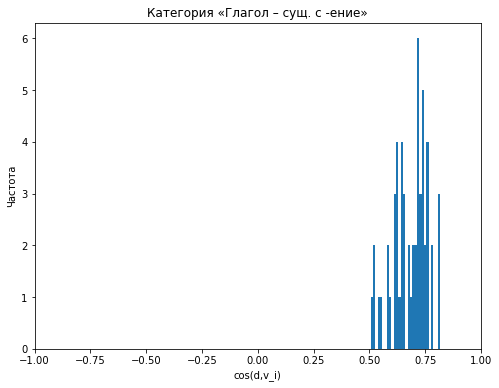

time: 172 ms (started: 2021-05-23 17:28:39 +03:00)


In [95]:
plt.figure(figsize=(8,6))
plt.hist(cos_list, bins=30)
plt.xlabel('cos(d,v_i)')
plt.ylabel('Частота')
plt.xlim(-1,1)
plt.title('Категория «Глагол – сущ. с -ение»')